<a href="https://colab.research.google.com/github/taledv/atpDataset/blob/Stable/atpDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import os

Collecting data over the years

In [2]:
# paths = [path for path in os.listdir('/content/drive/My Drive/Colab Notebooks/ATP_dataset/')]

# df = pd.DataFrame()
# for path in paths:
#   df = pd.concat([df, pd.read_csv('/content/drive/My Drive/Colab Notebooks/ATP_dataset/' + path)])
  
# df.to_csv('/content/drive/My Drive/Colab Notebooks/ATP_dataset/atp_matches_2000s.csv', index=False)

Creating database of both losers and winners

In [3]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/ATP_dataset/atp_matches_2000s.csv')
df.sample(10)
winnerStats = ['tourney_id', 'draw_size','winner_name', 'surface', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_bpSaved', 'w_bpFaced']
loserStats = ['tourney_id', 'draw_size', 'loser_name', 'surface', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_bpSaved', 'l_bpFaced']

winner = df[winnerStats]
winner['Outcome'] = 1
loser = df[loserStats]
loser['Outcome'] = 0

generalStats = ['tourId', 'tourSize', 'Name', 'Surface', 'Aces', 'doubleF', 'servPoint', '1stIn', '1stWon', 'bpSaved', 'bpFaced', 'Outcome']

data = pd.DataFrame(np.concatenate((winner.values, loser.values), axis=0))
data.columns = generalStats

data = data.sample(frac=1, random_state=3).reset_index(drop=True) 

data.head()

,tourId,tourSize,Name,Surface,Aces,doubleF,servPoint,1stIn,1stWon,bpSaved,bpFaced,Outcome
0,2016-M007,128,Viktor Troicki,Hard,10,4,133,86,67,6,8,1
1,2011-2276,28,Dusan Lajovic,Hard,3,2,68,45,24,6,11,0
2,2001-306,32,Christophe Rochus,Clay,1,1,71,44,25,4,7,1
3,2011-5014,56,Tomas Berdych,Hard,6,1,48,30,27,2,3,1
4,2020-0495,32,Yen Hsun Lu,Hard,3,4,85,45,28,10,14,0


Surface colors for plots :)

In [4]:
clayColor = '#FF8000'
hardColor = '#0080FF'
grassColor = '#009900'

Make Year column from tourId

In [5]:
data['Year'] = data['tourId'].apply(lambda x: x.split('-')[0])
data.drop(labels=['tourId'], axis=1, inplace=True)

In [6]:
print(data.isnull().sum())
data.dropna(inplace=True)
print(data.isnull().sum())

tourSize         0
Name             0
Surface        396
Aces         11978
doubleF      11978
servPoint    11978
1stIn        11978
1stWon       11978
bpSaved      11978
bpFaced      11978
Outcome          0
Year             0
dtype: int64
tourSize     0
Name         0
Surface      0
Aces         0
doubleF      0
servPoint    0
1stIn        0
1stWon       0
bpSaved      0
bpFaced      0
Outcome      0
Year         0
dtype: int64


In [7]:
print(data.dtypes)
data['Year'] = data['Year'].astype(int)
data['Outcome'] = data['Outcome'].astype(int)
data['tourSize'] = data['tourSize'].astype(int)
data['Aces'] = data['Aces'].astype(int)
data['doubleF'] = data['doubleF'].astype(int)
data['servPoint'] = data['servPoint'].astype(int)
data['1stIn'] = data['1stIn'].astype(int)
data['1stWon'] = data['1stWon'].astype(int)
data['bpSaved'] = data['bpSaved'].astype(int)
data['bpFaced'] = data['bpFaced'].astype(int)
data['1stIn'] = data['1stIn'].astype(int)
print(data.dtypes)

tourSize     object
Name         object
Surface      object
Aces         object
doubleF      object
servPoint    object
1stIn        object
1stWon       object
bpSaved      object
bpFaced      object
Outcome      object
Year         object
dtype: object
tourSize      int64
Name         object
Surface      object
Aces          int64
doubleF       int64
servPoint     int64
1stIn         int64
1stWon        int64
bpSaved       int64
bpFaced       int64
Outcome       int64
Year          int64
dtype: object


Dropping all carpet games (not interesting), and all games with missing data

In [8]:
data = data[data['Surface']!='Carpet']
data = data[data['1stIn']>0]

Creating Percentage statistics (that IMO more important)

In [9]:
data['1stPerc'] = 100*data['1stIn'] / data['servPoint']
data['1stPercWon'] = 100*data['1stWon'] / data['1stIn']
data['1stStrength'] = data['1stPerc'] * data['1stPercWon']
data['bpSavedPerc'] = 100*data['bpSaved'] / data['bpFaced']

When a players never faced a BP we divide by 0, so fill with 100%?

In [10]:
data['bpSavedPerc'] = data['bpSavedPerc'].fillna(value=100)
print(data.isnull().sum())

tourSize       0
Name           0
Surface        0
Aces           0
doubleF        0
servPoint      0
1stIn          0
1stWon         0
bpSaved        0
bpFaced        0
Outcome        0
Year           0
1stPerc        0
1stPercWon     0
1stStrength    0
bpSavedPerc    0
dtype: int64


First serve [%] across different surfaces

           1stPerc
Surface           
Clay     61.970234
Grass    62.794530
Hard     60.695453
           1stPerc
Surface           
Clay     60.103893
Grass    60.973229
Hard     58.753018
           1stPerc
Surface           
Clay     61.037038
Grass    61.883953
Hard     59.724267
           1stPerc
Outcome           
0        59.451337
1        61.354871


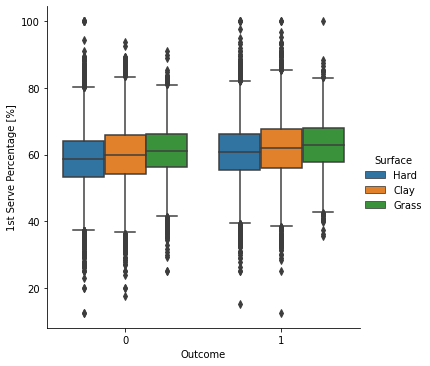

In [11]:
winners = data.loc[data['Outcome']==1]
losers = data.loc[data['Outcome']==0]

print(winners[['1stPerc', 'Surface']].groupby(by=['Surface']).mean())
print(losers[['1stPerc', 'Surface']].groupby(by=['Surface']).mean())

print(data[['1stPerc', 'Surface']].groupby(by=['Surface']).mean())
print(data[['1stPerc', 'Outcome']].groupby(by=['Outcome']).mean())

g = sns.factorplot(data=data, x='Outcome', y='1stPerc', kind='box', hue='Surface')
g = g.set_ylabels('1st Serve Percentage [%]')

First serve WON [%] across different surfaces 
We cann see that in clay first serve has less impact (since its so slow) 5-6% less than Grass 

         1stPercWon
Surface            
Clay      74.170380
Grass     79.212641
Hard      77.711833
         1stPercWon
Surface            
Clay      62.817250
Grass     68.950929
Hard      66.959514
         1stPercWon
Surface            
Clay      68.493659
Grass     74.082198
Hard      72.335850
         1stPercWon
Outcome            
0         65.813055
1         76.708979


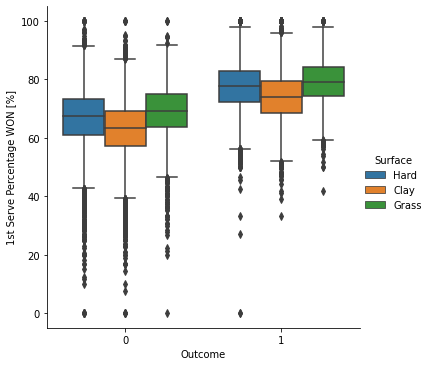

In [12]:
winners = data.loc[data['Outcome']==1]
losers = data.loc[data['Outcome']==0]

print(winners[['1stPercWon', 'Surface']].groupby(by=['Surface']).mean())
print(losers[['1stPercWon', 'Surface']].groupby(by=['Surface']).mean())

print(data[['1stPercWon', 'Surface']].groupby(by=['Surface']).mean())
print(data[['1stPercWon', 'Outcome']].groupby(by=['Outcome']).mean())

g = sns.factorplot(data=data, x='Outcome', y='1stPercWon', kind='box', hue='Surface')
g = g.set_ylabels('1st Serve Percentage WON [%]')

When accounting both FirstServe% and FirstServeWon (multiplying them) -> better separation between winners and losers

         1stStrength
Surface             
Clay     4584.635849
Grass    4970.366360
Hard     4710.869555
         1stStrength
Surface             
Clay     3764.446507
Grass    4197.989860
Hard     3926.155601


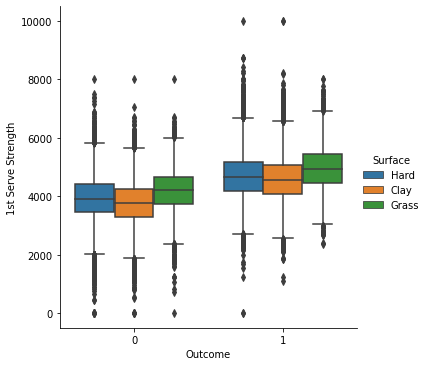

In [13]:
print(winners[['1stStrength', 'Surface']].groupby(by=['Surface']).mean())
print(losers[['1stStrength', 'Surface']].groupby(by=['Surface']).mean())
g = sns.factorplot(data=data, x='Outcome', y='1stStrength', kind='box', hue='Surface')
g = g.set_ylabels('1st Serve Strength')

Losers that have more than 80% 1st serve have a mean of 58% of 1st serve points WON ! so they should improve their first serve..

In [14]:
print(data.loc[(data['Outcome']==0) & (data['1stPerc']>80)]['1stPercWon'].mean())
data.loc[(data['Outcome']==0) & (data['1stPerc']>80)]

58.09121913171119


,tourSize,Name,Surface,Aces,doubleF,servPoint,1stIn,1stWon,bpSaved,bpFaced,Outcome,Year,1stPerc,1stPercWon,1stStrength,bpSavedPerc
1883,32,Fernando Verdasco,Clay,6,2,111,93,53,12,17,0,2017,83.783784,56.989247,4774.774775,70.588235
2245,32,Peter Luczak,Hard,4,2,61,54,35,1,2,0,2006,88.524590,64.814815,5737.704918,50.000000
3558,32,Sargis Sargsian,Clay,2,1,61,53,32,5,9,0,2000,86.885246,60.377358,5245.901639,55.555556
3653,28,Daniel Brands,Clay,4,0,51,41,16,2,8,0,2013,80.392157,39.024390,3137.254902,25.000000
4912,32,Donald Young,Clay,1,2,46,37,10,3,10,0,2018,80.434783,27.027027,2173.913043,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123889,128,Alexander Zverev,Hard,16,3,127,103,70,5,9,0,2020,81.102362,67.961165,5511.811024,55.555556
123988,32,Diego Junqueira,Clay,0,1,45,37,17,4,9,0,2010,82.222222,45.945946,3777.777778,44.444444
124062,32,Nikolay Davydenko,Hard,0,3,52,44,32,4,6,0,2005,84.615385,72.727273,6153.846154,66.666667
124468,56,Pablo Carreno Busta,Clay,1,0,90,75,58,0,1,0,2014,83.333333,77.333333,6444.444444,0.000000


How Break points affect the outcome

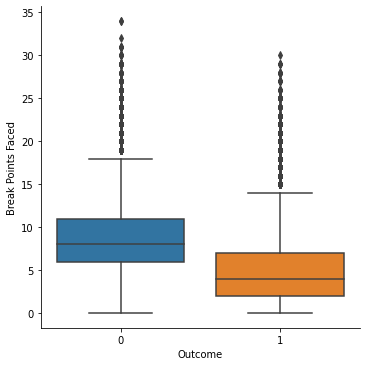

In [15]:
g = sns.factorplot(data=data, x='Outcome', y='bpFaced', kind='box')
g = g.set_ylabels('Break Points Faced')

Interesting, the first service increases over the years (what is the reason?)

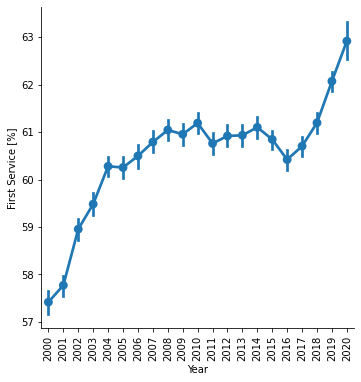

In [16]:
g = sns.factorplot(data=data, x='Year', y='1stPerc')
g.set_ylabels('First Service [%]')
g.set_xticklabels(rotation=90)

Not that interseing in the first service points won

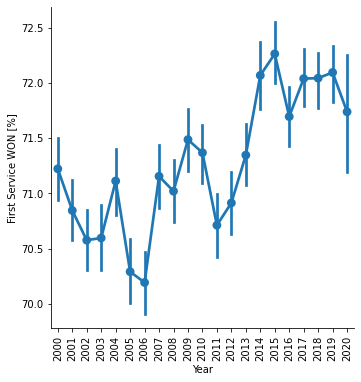

In [17]:
g = sns.factorplot(data=data, x='Year', y='1stPercWon')
g.set_ylabels('First Service WON [%]')
g.set_xticklabels(rotation=90)

Correlation materix between different features

In [ ]:
winners_for_corr = winners[['tourSize', 'Surface', 'Aces', 'doubleF', '1stPerc', '1stPercWon']]
f = plt.figure(figsize=(19, 15))
plt.matshow(winners_for_corr.corr(), fignum=f.number)
plt.xticks(range(winners_for_corr.shape[1]), winners_for_corr.columns, fontsize=14, rotation=75)
plt.yticks(range(winners_for_corr.shape[1]), winners_for_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Extracting the top players :)

In [18]:
Federer = data[data['Name']=='Roger Federer']
Djokovic = data[data['Name']=='Novak Djokovic']
Nadal = data[data['Name']=='Rafael Nadal']
Murray = data[data['Name']=='Andy Murray']
Zverev = data[data['Name']=='Alexander Zverev']

top = pd.concat([Federer, Djokovic, Nadal, Murray, Zverev])

Want to see if the service strength affects the outcome for Federer / Nadal / Djokovic

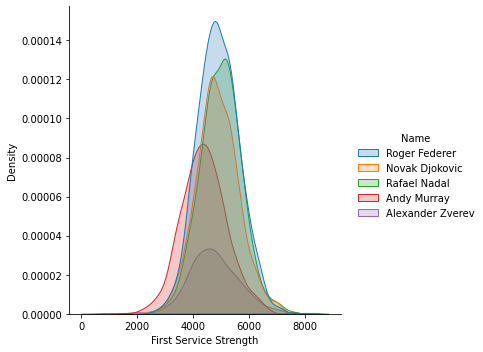

In [19]:
g = sns.displot(top, x='1stStrength', kind='kde',hue='Name', fill=True)
g.set_xlabels('First Service Strength')

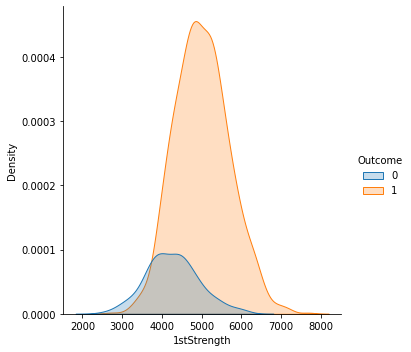

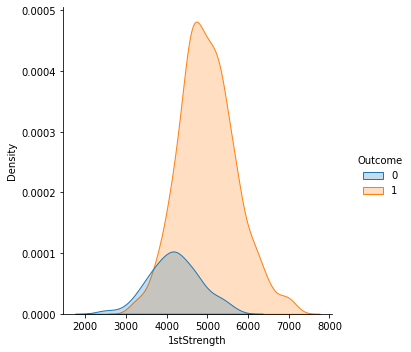

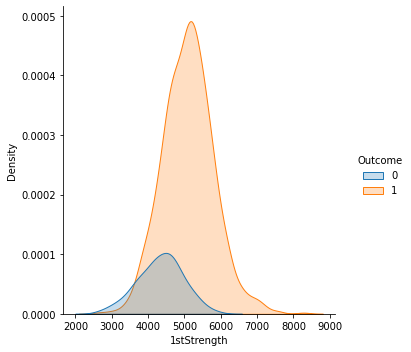

In [20]:
sns.displot(Federer, x='1stStrength', kind='kde', hue="Outcome", fill=True)
sns.displot(Djokovic, x='1stStrength', kind='kde',hue="Outcome", fill=True)
sns.displot(Nadal, x='1stStrength', kind='kde',hue="Outcome", fill=True)

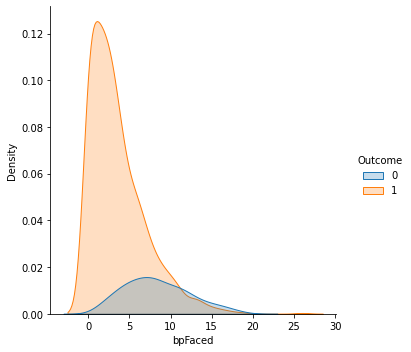

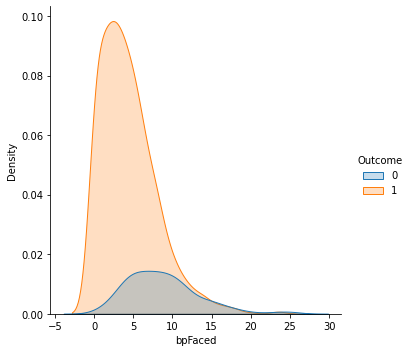

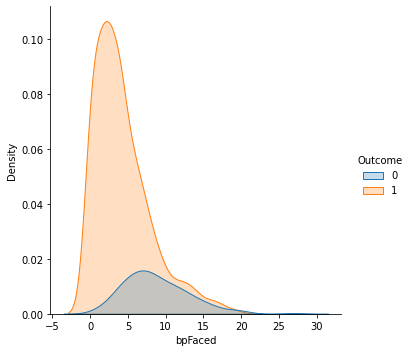

In [21]:
sns.displot(Federer, x='bpFaced', kind='kde',hue="Outcome", fill=True)
sns.displot(Djokovic, x='bpFaced', kind='kde',hue="Outcome", fill=True)
sns.displot(Nadal, x='bpFaced', kind='kde',hue="Outcome", fill=True)

Federer First serve over the years

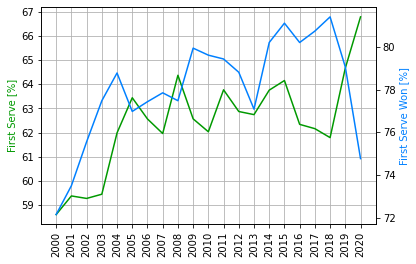

In [22]:
Fed_1stPerc = Federer.groupby('Year').mean()['1stPerc']
Fed_1stPercWon = Federer.groupby('Year').mean()['1stPercWon']
years = [str(year) for year, df in Federer.groupby('Year')] # Must be strings to show well on plots

_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(years, Fed_1stPerc, '#009900')
ax2.plot(years, Fed_1stPercWon, '#0080FF')

ax1.set_ylabel('First Serve [%]', color='#009900')
ax2.set_ylabel('First Serve Won [%]', color='#0080FF')
ax1.set_xticklabels(years, rotation='vertical', fontsize=10)
ax1.grid()
plt.show()

Federer's serves are more affective on Grass than Hard and lastly Clay.
Why the 1stPerc is higher on Grass? It should be uniform for all surfaces, maybe the surface affects the jump when serving?

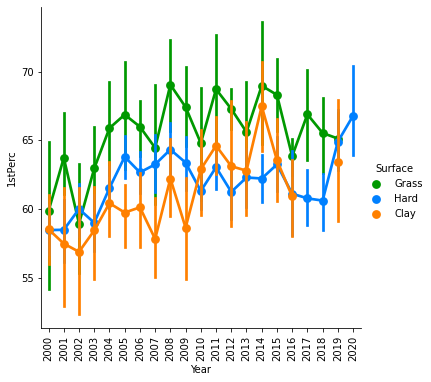

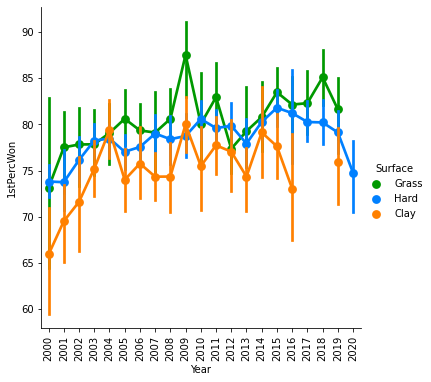

In [23]:
g = sns.factorplot(data=Federer, x='Year', y='1stPerc', hue='Surface', palette=[grassColor,hardColor,clayColor]) # RGB to see Hard-blue, Grass-Green ..
g.set_xticklabels(rotation=90)
g = sns.factorplot(data=Federer, x='Year', y='1stPercWon', hue='Surface', palette=[grassColor,hardColor,clayColor]) # RGB to see Hard-blue, Grass-Green ..
g.set_xticklabels(rotation=90)

Lets start to fit a model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Choosing the columns and creating (X,y)

In [25]:
columns = ['Surface', '1stPerc', '1stPercWon', '1stStrength', 'bpSavedPerc', 'bpFaced', 'Aces']

X = data[columns]
y = data['Outcome']

Converting name of surfaces to one hot vectors

In [ ]:
X = pd.get_dummies(X)
X.isnull().sum()

Split to train and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(87872, 9) (21968, 9)


Logistic Regreesion - doesn't overfit 76% on both train and test

In [41]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_pred_on_train = lr_model.predict(X_train)

acc = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_on_train)

print(acc_train,acc)

0.7690845775673707 0.7690731973780044


Decision trees overfit !!! 99.9% accuracy on train while 71% on test

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_pred_on_train = dt_model.predict(X_train)

acc = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_train, y_pred_on_train)

print(acc_train,acc)